## Introduction to Data Visualization in Python

In this notebook, we will explore how to create basic visualizations using Python. This notebook builds on the lessons you have learned in using the NumPy, and Pandas libraries. 

### Types of Basic Visualizations

In this notebook, we will explore the following types of visualizations, each useful for answering different types of questions:
1. **Bar Charts**: Useful for comparing quantities among different groups.
2. **Histograms**: Great for showing the distribution of data.
3. **Scatter Plots**: Helpful for observing relationships between variables.
4. **Line Plots**: Ideal for showing trends over time.

Note that we are intentionally excluding one the most basic and most commnon types of data visualizations: the pie chart. Pie charts have many flaws, which you can read about [here](https://towardsdatascience.com/the-case-against-the-pie-chart-43f4c3fccc6). There are always better options! 

### Getting Started with Visualization in Python

We'll use the following libraries:
- `matplotlib`: https://matplotlib.org/
- `seaborn`: https://seaborn.pydata.org/

Both libraries allow you to do a huge variety of data visualizations. Let's start by importing them, along with `pandas` and `numpy`, which we have seen before. 

In [2]:
# first install matplotlib and seaborn if you have not yet
# comment these lines out after installing
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

# then we can import and assign aliases
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
collegesDat = pd.read_csv('data/colleges.csv')

# (1) Bar charts


Bar charts are a type of graphical representation used to display and compare the frequency, count, or other measure (like mean) for different discrete categories or groups. In a bar chart, each category is represented by a bar, where the length (or height, depending on the orientation) of the bar is proportional to the value it represents.


### Things to Keep in Mind

1. **Appropriate Scale**: The scale of the axis should be chosen appropriately to accurately represent the data without exaggeration or minimization. Avoid truncating the y-axis! Starting the y-axis at a value greater than zero can exaggerate differences between groups and mislead the viewer.
2. **Labeling**: Proper labeling of axes, including units of measurement, is essential for clarity.
3. **Order of Bars**: The sequence of the bars can affect how the data is perceived. In some cases, it may be beneficial to sort the bars by size or in a particular order.
4. **Color and Design**: The use of color and design should enhance readability, not distract from the data. Overly complex designs can make the chart difficult to interpret.
5. **Overcrowding**: Including too many categories can make the chart cluttered and hard to read.

As an example, let's create a simple bar chart that addresses the following research question: **What is the most common highest degree offered across all the colleges in our colleges dataset? Or, how many colleges offer a specific degree as their highest degree?**

highest_degree
Graduate       1464
Certificate    1374
Associates     1096
Bachelors       501
Name: count, dtype: int64


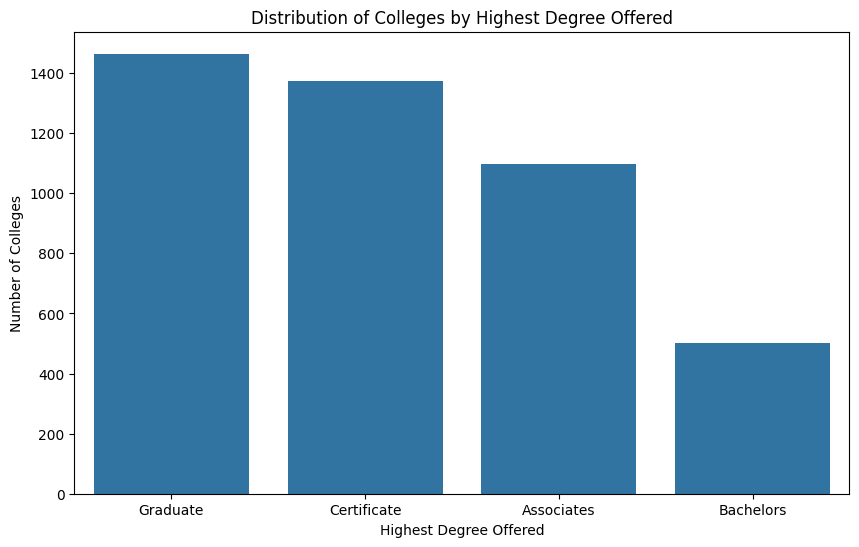

In [4]:
# First we need to get counts of all the categories
highest_degree_counts = collegesDat['highest_degree'].value_counts()

# Let's take a look
# Print numbers
print(highest_degree_counts)

# This line creates a new figure for plotting with a specified size.
# This isn't necessary but allows you to size the plot 
plt.figure(figsize=(10, 6)) # this is specifying 10 in wide and 6 in tall

# This line creates a bar plot using the Seaborn library.
# sets the x-axis values to be the indices (row names) of the highest_degree_counts DataFrame (i.e. different categories)
# sets the y-axis values to be the actual counts corresponding to each category in highest_degree_counts.
sns.barplot(x=highest_degree_counts.index, y=highest_degree_counts.values)

# The following lines specify labels
plt.title('Distribution of Colleges by Highest Degree Offered')
plt.xlabel('Highest Degree Offered')
plt.ylabel('Number of Colleges')

# This prints the plot
plt.show()


Now let's expand a little. Suppose our question of interest is: **Are there more colleges that offer graduate degrees in some regions compared to others? By region, how does the number of colleges that offer graduate degrees compare to colleges that provide other types of degrees as their highest degree.** So here, we can create a bar chart that allows for making comparisons with multiple bars (counts of different highest degrees) nested within another category (region). 

                 region highest_degree  count
0              Far West     Associates    172
1              Far West      Bachelors     89
2              Far West    Certificate    196
3              Far West       Graduate    160
4               Midwest     Associates    261
5               Midwest      Bachelors    118
6               Midwest    Certificate    324
7               Midwest       Graduate    371
8             Northeast     Associates    189
9             Northeast      Bachelors     89
10            Northeast    Certificate    328
11            Northeast       Graduate    384
12  Rockies & Southwest     Associates    196
13  Rockies & Southwest      Bachelors     56
14  Rockies & Southwest    Certificate    209
15  Rockies & Southwest       Graduate    159
16                South     Associates    277
17                South      Bachelors    132
18                South    Certificate    311
19                South       Graduate    352
20          Territories     Associ

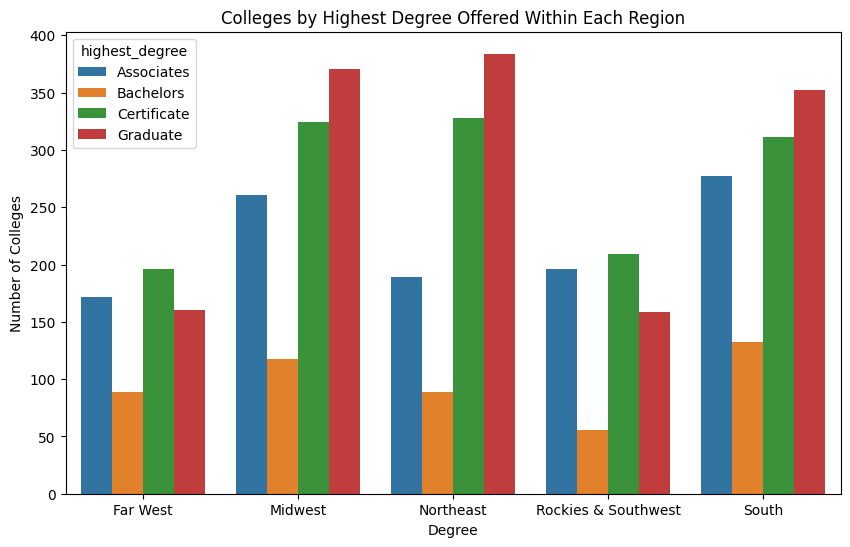

In [5]:
# First we need to get counts of all the categories 
# Here we use the groupby() function to group the data by region and highest_degree
# We then use the size() function to get the counts of each group
# Finally, we use the reset_index() function to convert the resulting Series to a DataFrame
# This DataFrame will have two columns: 'region' and 'highest_degree' and a third column 'count' with the number of colleges in each group
region_degree_counts = collegesDat.groupby(['region', 'highest_degree']).size().reset_index(name='count')

# Let's see what this looks like
print(region_degree_counts)

# Let's drop territories and US Service Schools
region_degree_counts_mod = region_degree_counts[~region_degree_counts['region'].isin(['Territories','US Service Schools'])]
print(region_degree_counts_mod)

# This line creates a new figure for plotting with a specified size.
# This isn't necessary but allows you to size the plot 
plt.figure(figsize=(10, 6)) # this is specifying 10 in wide and 6 in tall

# This line creates a bar plot using the Seaborn library.
# sets the x-axis values to be the indices of the highest_degree_counts DataFrame
# sets the y-axis values to be the actual counts corresponding to each category in highest_degree_counts.
# sets the hue to be the 'highest_degree' column, which will create different colored bars for each degree within each region
sns.barplot(x='region', y='count', hue='highest_degree', data=region_degree_counts_mod)

# The following lines specify labels
plt.title('Colleges by Highest Degree Offered Within Each Region')
plt.xlabel('Degree')
plt.ylabel('Number of Colleges')

# This prints the plot
plt.show()


# (2) Histograms

A histogram is used to show the distribution of numeric data. It is essentially a bar chart that groups data points into ranges or 'bins'. Each bin represents a range of values, and the height of the bar shows the frequency or number of data points that fall within that range.

Histograms are valuable for visualizing and understanding the distribution of a dataset. They show how data is spread out, which can highlight patterns like normal distribution, skewness, or bimodality. Histograms can make it easier to spot outliers and unusual patterns in the data, which might require further investigation.

Histograms can be used to compare distributions across different datasets or groups within a dataset. By revealing the distribution's shape, histograms can inform the choice of statistical tests or models to apply.

### Things to Keep in Mind

1. **Number of Bins**: The choice of the number of bins (or the width of each bin) can significantly affect the histogram's appearance and the conclusions drawn from it. Too many bins can make the data appear noisy, while too few can oversimplify the distribution.
2. **Starting Point of Bins**: The place where bins start can affect the histogram's appearance. Different starting points can sometimes lead to different interpretations.
3. **Unequal Bin Widths**: Bins are typically of equal size, but if they aren’t, it should be clearly indicated as it affects interpretation.
4. **Axis Scale**: Be mindful of the scale on the y-axis. It usually represents frequency or density, and misrepresenting this can lead to misinterpretation.

Let's look at some examples. 

Let's look at some examples. **First, what is the distribution graduation rates across all colleges in our dataset? Second, what is the distributio of enrollment across all colleges in our dataset?**

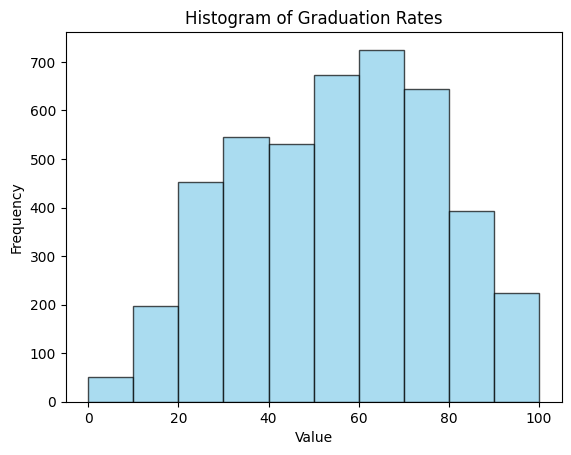

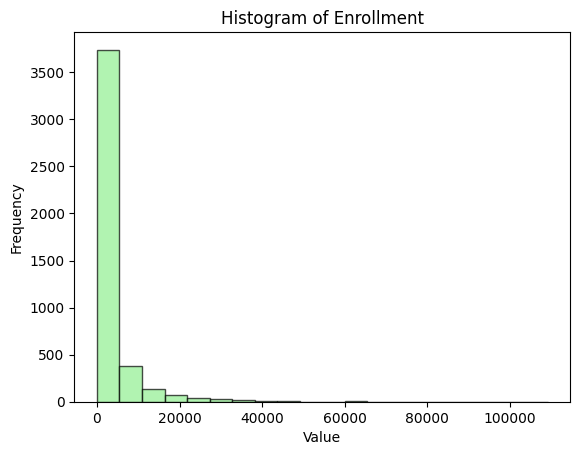

In [10]:
# Creating the histogram of graduate rates
plt.hist(collegesDat['grad_rate'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Graduation Rates')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Creating the histogram of enrollment
plt.hist(collegesDat['enrollment'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Enrollment')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


We can also use histograms to compare the distributions a variable for two different conditions. For example: **How does the *distribution* of average cost of college compare in the Northeast compare to the *distribution* of average cost of college in the South.** Recall that average cost is a variable in our data set. I assume is the average across different programs within the college. 

So here, we will first filter our data to colleges in the Northeast or in the South. Then we will plot histograms for both regions on the same figure.

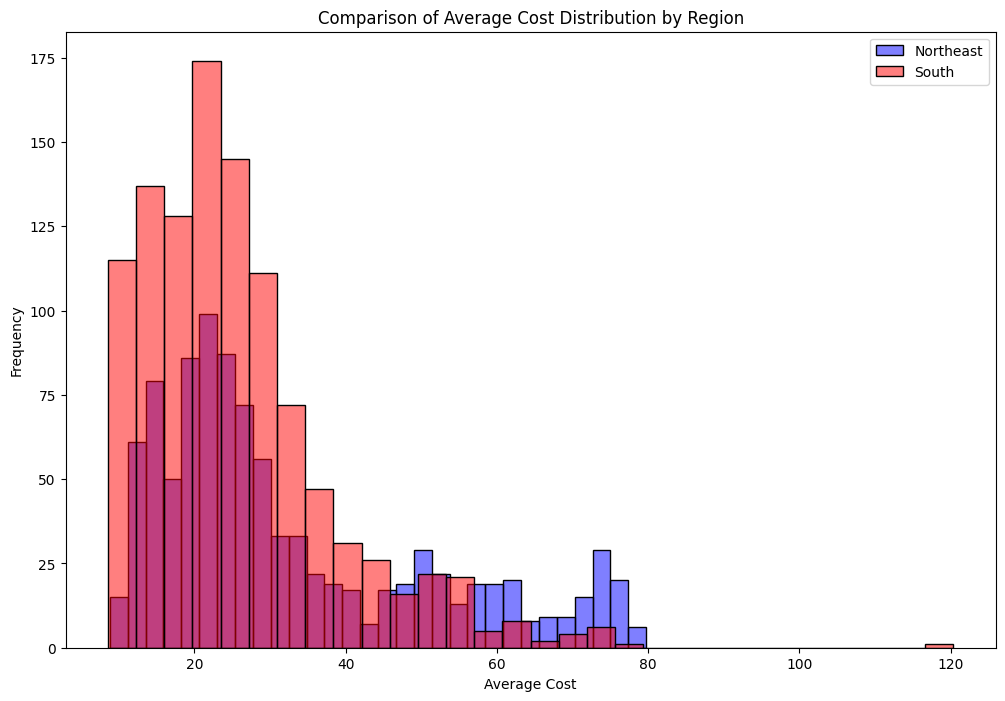

In [11]:
# Filter the DataFrame for the two regions
northeast_data = collegesDat[collegesDat['region'] == 'Northeast']['avg_cost']
south_data = collegesDat[collegesDat['region'] == 'South']['avg_cost']

# Create a new figure for the histograms
plt.figure(figsize=(12, 8))

# Plot the histogram for the Northeast region
# Set the color to blue and add a label for the legend
# alpha is the transparency of the bars (0 is transparent, 1 is opaque)
sns.histplot(northeast_data, color='blue', label='Northeast', bins=30, alpha=0.5)

# Plot the histogram for the South region
# Set the color to red and add a label for the legend
sns.histplot(south_data, color='red', label='South', bins=30, alpha=0.5)

# Add title and labels
plt.title('Comparison of Average Cost Distribution by Region')
plt.xlabel('Average Cost')
plt.ylabel('Frequency')

# Add a legend to distinguish between the two regions
plt.legend()

# Show the plot
plt.show()

### Explanation of Scatter Plots

A scatter plot is a type of data visualization that displays values from two variables as points on a two-dimensional graph. Each point represents an observation. The position on the horizontal (x) and vertical (y) axes represents the values of the two variables.

Scatter plots are used to observe and show relationships between two numeric variables. They can reveal if a change in one variable might be associated with a change in another (correlation). These plots can help in identifying different types of relationships between variables, such as linear, nonlinear, or no relationship. They are also useful for spotting outliers or anomalies that may indicate errors or special cases. Moreover, scatter plots can give a general idea of data distribution and density.

When deciding which variable to place on the x-axis and which to place on the y-axis in a scatter plot, you might think about dependent vs. independent Variables:
- Dependent Variable: The dependent variable is the variable you want to try to explain or to see how it varies based on the independent variable. The dependent variable is placed on the y-axis (vertical axis).
- Independent Variable: Typically, the independent variable is an explanatory variable. It is placed on the x-axis (horizontal axis).

### Things to Keep in Mind

1. **Correlation vs. Causation**: A common misconception is to assume that correlation implies causation. Just because two variables show a relationship in a scatter plot does not mean one variable causes the other to change.
2. **Overplotting**: With large datasets, points on a scatter plot can overlap, making it difficult to see individual data points or understand the data's distribution. This issue can be mitigated with techniques like alpha blending, jittering, or using a hexbin plot.
3. **Scale and Range**: The choice of scale and range for the axes can dramatically affect the plot's appearance and interpretability. It's essential to use scales and ranges that accurately represent the data.
4. **Interpretation**: Be cautious about drawing conclusions from scatter plots, especially when the relationship isn't clear or data points are sparse.

**Let's look at example exploring the question: How do graduation rates vary with the average cost at the colleges in our dataset?**

Note that since our data is already at the level at which we want to plot - at the college level - we don't need to aggregate the data.

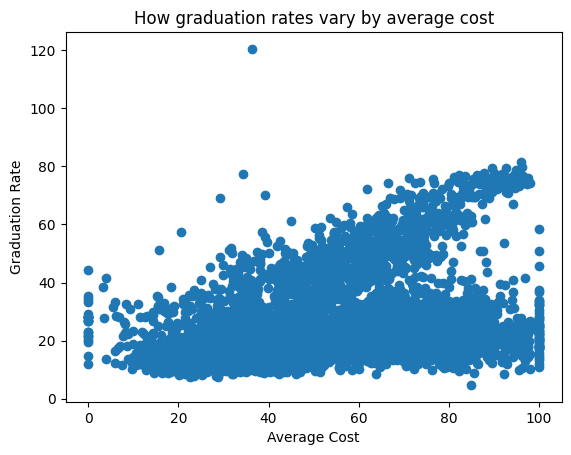

In [12]:
# Creating the scatter plot using matplotlib.pyplot
plt.scatter(collegesDat['grad_rate'],collegesDat['avg_cost'])
plt.title('How graduation rates vary by average cost')
plt.xlabel('Average Cost')
plt.ylabel('Graduation Rate')
plt.show()


To try to understand this better, we might ask: **Does the relationship between graduation rate and average cost vary by whether the school is public, private (and not for profit), or private for profit?** We can add this third dimension to our plot by using the `hue` parameter in `sns.scatterplot()`.

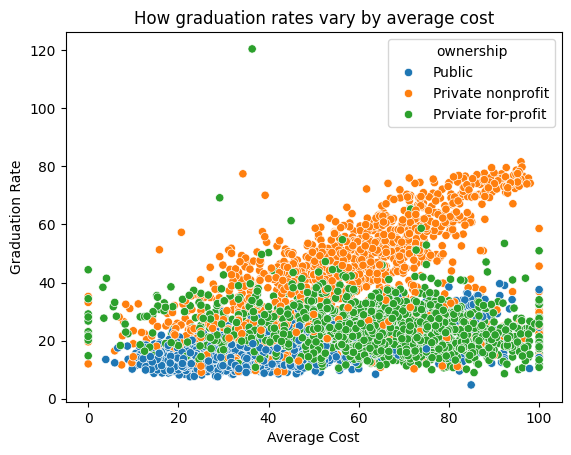

In [49]:
# Creating the scatter plot using seaborn
sns.scatterplot(data = collegesDat, x ='grad_rate', y = 'avg_cost', hue='ownership')
plt.title('How graduation rates vary by average cost')
plt.xlabel('Average Cost')
plt.ylabel('Graduation Rate')
plt.show()

# Line graphs

Line graphs are most commmonly used to display quantitative information over time. That is, time is on the x-axis and the variable for which we want to explore trends over time is on the y-axis. However, line graphs may also have some  other ordering along the x-axis - for example a dosage of a drug, or expense in dollars. 

### Things to Keep in Mind

**Make sure the graph is right for the data:** Line graphs are best suited for data with a logical sequence. Using them for discrete, unordered categories can be misleading.
**Scale**: The choice of scale on the axes can dramatically change the perception of data. Misrepresenting this can lead to misinterpretation.
**Number of lines:** Including too many lines on a single graph can lead to clutter and confusion. We'll see an example of this below. 

For our line graph, let's explore the question: **How does median earnings of alumni vary with educational spending per student?**


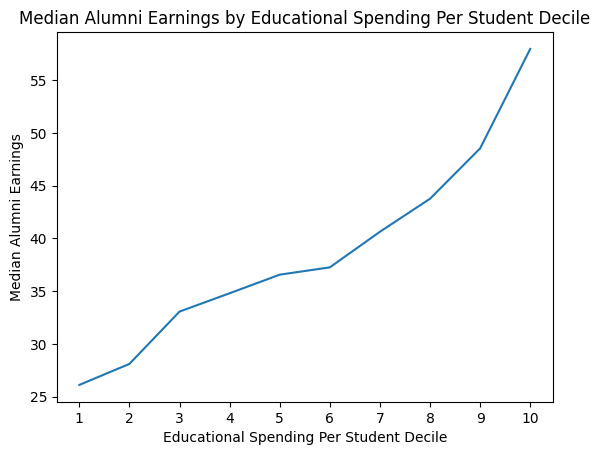

In [40]:
# Define bins for educational spending per student
ed_spending_deciles = pd.qcut(collegesDat['ed_spending_per_student'], q=10)

# name each of the bins as 1 to 10
ed_spending_deciles = ed_spending_deciles.cat.rename_categories(range(1, 11))

# Print the bins to check
#print("Educational Spending Per Student Deciles:")
#print(ed_spending_deciles)

# Calculate median alumni earnings for each educational spending bin
median_earnings_per_bin = collegesDat.groupby(ed_spending_deciles, observed=False)['med_alum_earnings'].median()

# Plot the binned data
median_earnings_per_bin.plot(kind='line')
plt.title('Median Alumni Earnings by Educational Spending Per Student Decile')
plt.xlabel('Educational Spending Per Student Decile')
plt.ylabel('Median Alumni Earnings')

# Add x-axis labels for each decile
plt.xticks(ticks=range(10), labels=[f'{i+1}' for i in range(10)])

# Show the plot
plt.show()

In [51]:
# Note that to access documentation for the plot function in the matplotlib library, you can use the following command:
# help(plt.plot)

What if we want to look at how the relationship between median earnings and educational spending per student varies by state? We might plot a different line for each state.

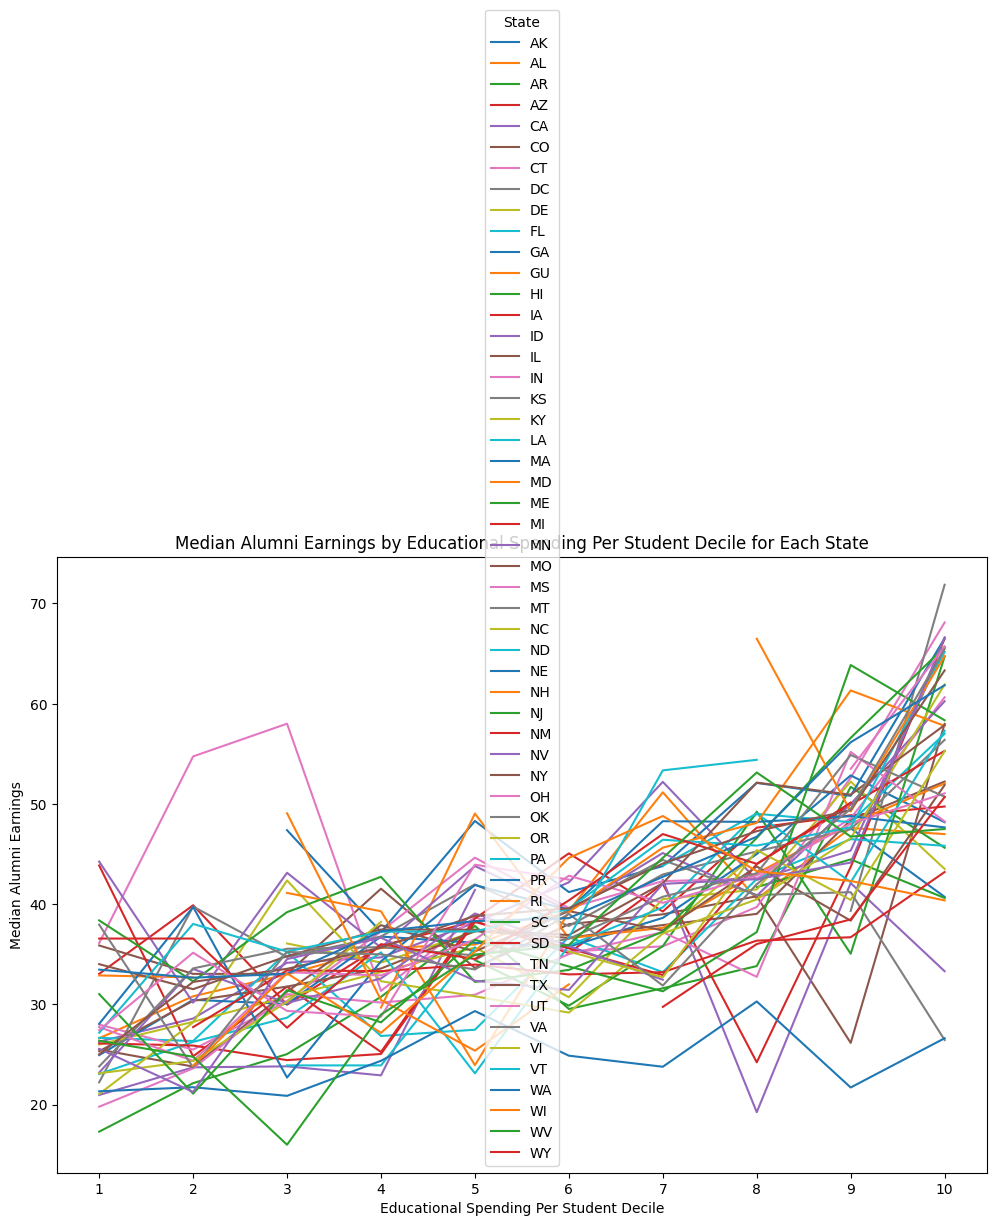

In [44]:
# Calculate median alumni earnings for each ed_spending_decile and state
median_earnings_per_bin_state = collegesDat.groupby([ed_spending_deciles, 'state'], observed=False)['med_alum_earnings'].median().unstack()

# Plot the binned data for each state
median_earnings_per_bin_state.plot(kind='line', figsize=(12, 8))
plt.title('Median Alumni Earnings by Educational Spending Per Student Decile for Each State')
plt.xlabel('Educational Spending Per Student Decile')
plt.ylabel('Median Alumni Earnings')

# Add x-axis labels for each decile
plt.xticks(ticks=range(10), labels=[f'{i+1}' for i in range(10)])

# Show the plot
plt.legend(title='State')
plt.show()


This is a mess. But what if we want to focus on how a particular state compares to all the others? 

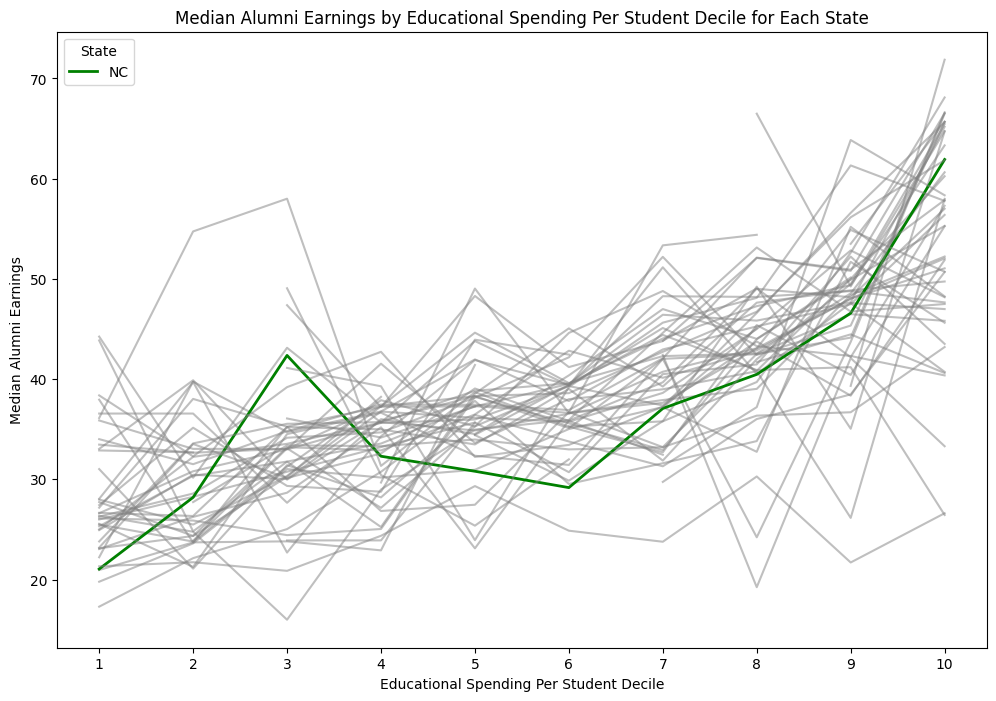

In [46]:
# This is required for the custom legend
from matplotlib.lines import Line2D

# designate state to highlight
highlight_state = 'NC'  

# create the plot
plt.figure(figsize=(12, 8))

# plot each state
for state in median_earnings_per_bin_state.columns:
    if state == highlight_state:
        plt.plot(median_earnings_per_bin_state.index, median_earnings_per_bin_state[state], label=state, color='green', linewidth=2)
    else:
        plt.plot(median_earnings_per_bin_state.index, median_earnings_per_bin_state[state], color='gray', alpha=0.5)

# add title and labels
plt.title('Median Alumni Earnings by Educational Spending Per Student Decile for Each State')
plt.xlabel('Educational Spending Per Student Decile')
plt.ylabel('Median Alumni Earnings')

# add x-axis labels for each decile
plt.xticks(ticks=range(1, 11), labels=[f'{i}' for i in range(1, 11)])

# adjust the legend to only show the highlighted state with the correct color
custom_legend = [Line2D([0], [0], color='green', lw=2)]
plt.legend(custom_legend, [highlight_state], title='State', loc='upper left')

# show the plot
plt.show()


# Box Plot

Box plots (also called box and whiskers plots), like histograms, are helpful for showing the distribution of data. However, they are better set up for comparing distributions across multiple variables or distributions within groups like in the following example. 

Here’s how to interpret the various components of a box plot:

### Components of a Box Plot

1. **Median (Second Quartile):**
   - The line within the box represents the median of the dataset, dividing it into two halves. The median is the value that separates the higher half from the lower half of the data.

2. **First and Third Quartiles:**
   - The edges of the box mark the first quartile (Q1) and third quartile (Q3) of the data. The first quartile is the median of the lower half of the data, while the third quartile is the median of the upper half.
   - The interquartile range (IQR) is the distance between the first and third quartiles and represents the middle 50% of the data.

3. **Whiskers:**
   - The lines extending from the top and bottom of the box, known as whiskers, indicate variability outside the upper and lower quartiles. They show the range of the data distribution, excluding outliers.
   - The length of the whiskers varies depending on the method used, but they typically extend to the smallest and largest values within 1.5 times the IQR from the first and third quartiles, respectively.

4. **Outliers:**
   - Outliers are data points that fall outside the range of the whiskers. They are often represented by dots or asterisks beyond the whiskers.
   - An outlier is a value that is significantly higher or lower than most of the data in the dataset, indicating an anomaly or unique characteristic within the data set.



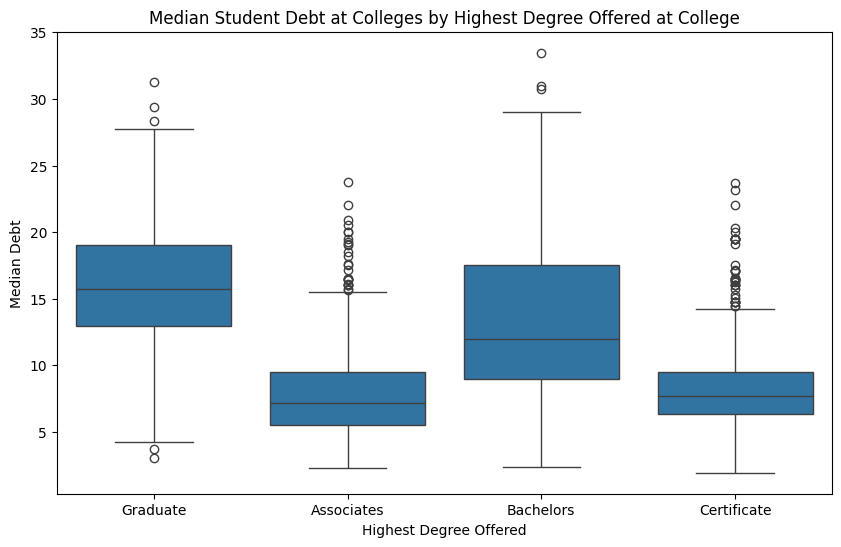

In [56]:
# The variable we assess the distribution of is on y-axis and the grouping variable is on the x-axis. 
plt.figure(figsize=(10, 6))
sns.boxplot(x='highest_degree', y='median_debt', data=collegesDat)
plt.title('Median Student Debt at Colleges by Highest Degree Offered at College')
plt.xlabel('Highest Degree Offered')
plt.ylabel('Median Debt')
plt.show()